In [2]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
n_task_per_file = 50
n_files = 10
#base_dir = "vary_p_denser_"
base_dir = "prop/vary_p_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [4]:
oper_char_df = pd.DataFrame()

for f_dir in files_list:
    oper_char_i = joblib.load(f_dir)
    oper_char_df = pd.concat([oper_char_df, pd.DataFrame(oper_char_i)])

In [5]:
#oper_char_df = oper_char_df[oper_char_df['p']<50]

In [6]:
oper_char_df.index = range(oper_char_df.shape[0])

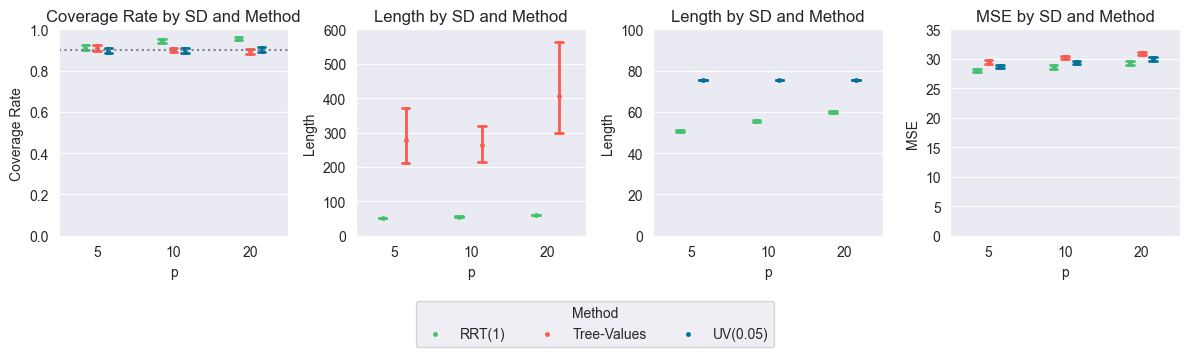

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
metrics = ["Coverage Rate", "Length", "Length", "MSE"]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=False)

oper_char_df['Method'] = oper_char_df['Method'].replace('RRT', 'RRT(1)')

my_palette = {"RRT(1)": "#48c072",
              "Tree-Values": "#fc5a50",
              "UV(0.05)": "#03719c"}

# Iterate over each metric and create a box plot
for i, metric in enumerate(metrics):
    oper_char_df_i = oper_char_df.copy()
    if i == 1:
        oper_char_df_i = oper_char_df[oper_char_df['Method'] != "UV(0.05)"]
    elif i == 2:
        oper_char_df_i = oper_char_df[oper_char_df['Method'] != "Tree-Values"]
    sns.pointplot(x='p', y=metric, hue='Method', data=oper_char_df_i, ax=axes[i],
                  dodge=0.3, linestyle='none', markersize=1.5,
                  err_kws={'linewidth': 2}, capsize=0.1, palette=my_palette)
    axes[i].set_title(f'{metric} by SD and Method')
    axes[i].set_xlabel('p')
    #axes[i].set_ylabel(metric if i == 0 else '')  # Only set ylabel on the first plot for clarity
    axes[i].legend(title='Method', loc='upper right')
    if metric == "Coverage Rate":
        axes[i].set_ylim(0.,1)
        axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
    elif i == 1:
        axes[i].set_ylim(0,600)
    elif i == 2:
        axes[i].set_ylim(0,100)
    elif metric == "MSE":
        axes[i].set_ylim(0,35)

# Remove legends from individual subplots
for ax in axes:
    ax.legend_.remove()

# Create a shared legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Method", loc="upper center", bbox_to_anchor=(0.5, 0), ncol=3)

# Adjust layout and display
plt.tight_layout()
plt.show()



In [13]:
oper_char_df

,Coverage Rate,Length,MSE,Method,p
0,0.500000,38.717952,31.427251,RRT(1),5
1,0.666667,358.391435,32.484935,Tree-Values,5
2,1.000000,75.376663,30.692967,UV(0.05),5
3,1.000000,60.816531,35.264500,RRT(1),10
4,0.875000,201.730823,35.180564,Tree-Values,10
...,...,...,...,...,...
4495,1.000000,64.588243,35.758366,Tree-Values,10
4496,1.000000,75.376663,32.045523,UV(0.05),10
4497,1.000000,55.287128,27.341781,RRT(1),20
4498,1.000000,64.826218,26.746691,Tree-Values,20


In [9]:
means = oper_char_df.groupby(['Method', "p"])[["Coverage Rate", "Length", "MSE"]].mean().reset_index()
means

,Method,p,Coverage Rate,Length,MSE
0,RRT(1),5,0.911010,50.743328,28.040053
1,RRT(1),10,0.945752,55.454894,28.631706
2,RRT(1),20,0.955124,59.928228,29.289085
3,Tree-Values,5,0.910250,inf,29.463524
4,Tree-Values,10,0.900762,263.015037,30.239196
5,Tree-Values,20,0.893662,407.708974,30.943452
6,UV(0.05),5,0.896295,75.376663,28.695593
7,UV(0.05),10,0.899114,75.376663,29.403067
8,UV(0.05),20,0.902233,75.376663,29.988374


In [10]:
tree_flag = (oper_char_df['Method'] == "Tree-Values")

In [11]:
oper_char_df[tree_flag].groupby(['p'])['Length'].apply(lambda x: np.isinf(x).mean()).reset_index(name='proportion_infinity')

,p,proportion_infinity
0,5,0.002
1,10,0.000
2,20,0.000
